In [3]:
import pathlib
import pickle
import sys

In [6]:
sys.path.append(str(pathlib.Path('../').resolve()))

In [7]:
from lib.utils.enums import Dataset
from lib.utils.data import load_integer_dataset
from lib.utils.nn import accuracy

## Model

In [3]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
config = dict(
    dataset=Dataset.FASHION_MNIST.name,
    subsample_ratio=1.0,
    ohe_values=(0, 32),
    data_augmentation=True,
    normalize=True,
    device='cuda'
)

## Data

Training on 50000 samples
Data normalized. New statistics:
-  Min: -46
-  Max: 112
- Mean: 0
-  Std: 55

Moved data to device: <CUDA Device 0>
Train set:  (50000, 1, 28, 28), (50000, 10)
Val set:    (10000, 1, 28, 28), (10000, 10)
Test set:   (10000, 1, 28, 28), (10000, 10)
Data types: (int8, int8)


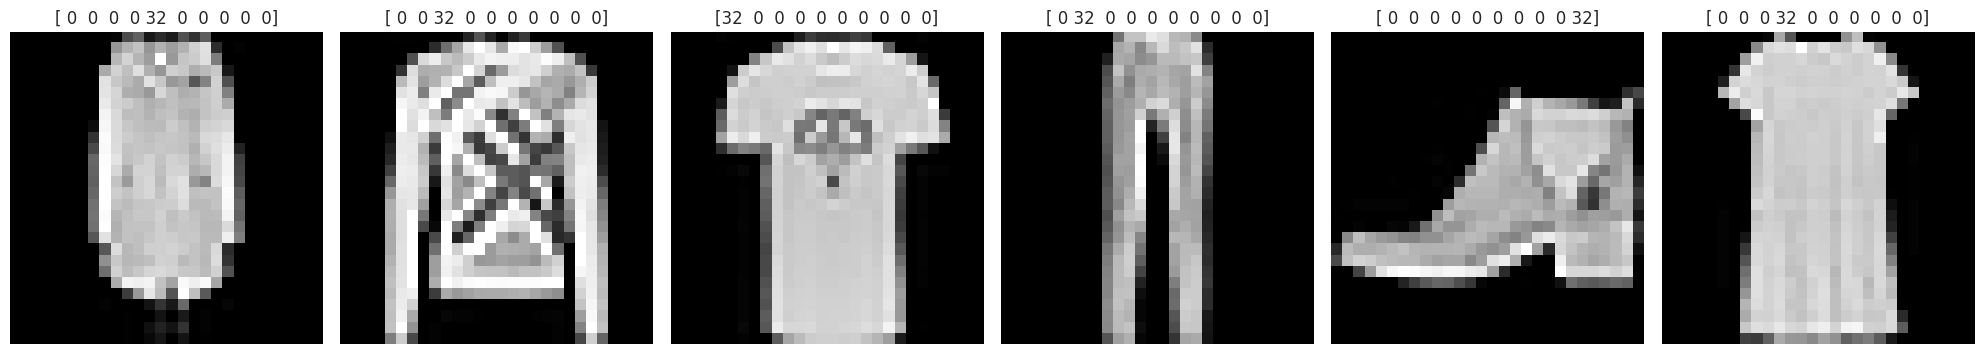

In [5]:
# Show the data and the model
dataset = load_integer_dataset(config, ohe_values=config["ohe_values"], val_dim=10_000, show_images=True)
X_train, X_val, X_test, y_train, y_val, y_test = dataset

## Evaluation

In [6]:
y_pred_train = model.predict(X_train, progress_bar=True)
y_pred_val = model.predict(X_val, progress_bar=True)
y_pred_test = model.predict(X_test, progress_bar=True)

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

In [7]:
print(f"Output accuracy:")
print(f"- Train accuracy: {accuracy(y_train, y_pred_train):.2%}")
print(f"-   Val accuracy: {accuracy(y_val, y_pred_val):.2%}")
print(f" - Test accuracy: {accuracy(y_test, y_pred_test):.2%}")

Output accuracy:
- Train accuracy: 95.07%
-   Val accuracy: 95.05%
 - Test accuracy: 93.23%


In [8]:
y_subnets = model.subnetworks_predict(X_train, progress_bar=True)
for i, y_subnet in enumerate(y_subnets):
    subnet_acc = accuracy(y_train, y_subnet)
    print(f'Local train accuracy {i}: {subnet_acc:.2%}')

  0%|          | 0/391 [00:00<?, ?it/s]

In [ ]:
y_subnets = model.subnetworks_predict(X_val, progress_bar=True)
for i, y_subnet in enumerate(y_subnets):
    subnet_acc = accuracy(y_val, y_subnet)
    print(f'Local val accuracy {i}: {subnet_acc:.2%}')

  0%|          | 0/79 [00:00<?, ?it/s]

Local val accuracy 0: 88.72%
Local val accuracy 1: 94.03%
Local val accuracy 2: 95.77%
Local val accuracy 3: 95.35%
Local val accuracy 4: 95.67%
Local val accuracy 5: 95.52%
Local val accuracy 6: 95.06%


In [ ]:
y_subnets = model.subnetworks_predict(X_test, progress_bar=True)
for i, y_subnet in enumerate(y_subnets):
    subnet_acc = accuracy(y_test, y_subnet)
    print(f'Local test accuracy {i}: {subnet_acc:.2%}')

  0%|          | 0/79 [00:00<?, ?it/s]

Local test accuracy 0: 87.94%
Local test accuracy 1: 91.48%
Local test accuracy 2: 92.90%
Local test accuracy 3: 93.27%
Local test accuracy 4: 93.61%
Local test accuracy 5: 93.71%
Local test accuracy 6: 93.51%
